# HW2 CompSem
## Выполнила Яна Захарова, БКЛ213. 😊

## Шаг 1
Взять любую предобученную векторную модель для русского языка и извлечь оттуда вектор для глагола и каждого существительного из списка. Здесь лежит хендаут по word2vec, который может вам пригодиться.

In [15]:
#Все библиотеки
import zipfile
import wget

import gensim
from gensim.models import Word2Vec
from gensim.models.word2vec import Word2Vec # Собственно модель.
from gensim.models import KeyedVectors # Семантические вектора.

import numpy as np
import matplotlib.pyplot as plt

import scipy
import scipy.cluster.hierarchy as hcluster
from scipy.spatial.distance import cosine


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
model_url = 'http://vectors.nlpl.eu/repository/20/65.zip'
m = wget.download(model_url)
model_file = model_url.split('/')[-1]

100% [....................................................................] 2540031150 / 2540031150

In [5]:
with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

In [129]:
with open("C:/Users/Яна/Downloads/HW2_igrat'.txt", 'r', encoding='utf-8') as file_play:
    lines = file_play.readlines()
    
    nouns_for_word2vec = []

    for line in lines:
        parts = line.strip().split('\t')

        if len(parts) == 2:
            verb, noun = parts[0].split('_')

            nouns_for_word2vec.extend([noun])
    if verb in model:
        print(verb)
        verb_vector = model[verb]
        print(verb_vector)
    for noun in nouns_for_word2vec:
        if noun in model:
            print(noun) 
            noun_vector = model[noun]
            print(noun_vector)



играть
[-6.766560e-01  1.679190e-01 -2.016480e-01  4.168500e-02  5.739830e-01
 -4.004000e-03  2.097650e-01  1.899830e-01 -5.308080e-01 -1.001530e-01
  3.062200e-02 -1.363780e-01 -2.963820e-01 -2.120310e-01  3.427260e-01
  7.866400e-02  9.508100e-02 -1.643740e-01  1.391700e-01  7.049100e-02
  6.647700e-02 -7.262800e-02  1.105191e+00 -8.415320e-01  5.389940e-01
 -3.284210e-01 -8.735100e-02 -2.132920e-01 -1.150240e-01  4.068140e-01
 -5.268160e-01  3.938760e-01 -2.795870e-01  2.052460e-01 -6.400820e-01
  8.403330e-01  3.963600e-01 -2.312750e-01  1.869220e-01 -3.917100e-01
  8.984200e-02  6.155810e-01  4.343670e-01  2.847810e-01  5.756600e-02
  1.884000e-01  5.384860e-01 -9.256500e-02  2.846830e-01 -5.506800e-02
 -2.311630e-01 -1.040260e-01  2.276200e-02  6.095240e-01  2.128130e-01
 -2.170070e-01 -2.330040e-01  9.280160e-01  3.023760e-01 -3.565890e-01
 -1.215280e-01 -4.182310e-01 -8.765900e-02  1.520200e-01  7.541520e-01
 -1.334900e-02  1.156300e-02 -5.218030e-01  7.917210e-01  7.100870e-01

## Шаг 2
На основе этих векторов построить репрезентацию для каждой пары «глагол + существительное» с помощью простой аддитивной модели композиции.
Примечание. Если каждый вектор – это объект типа array в модуле numpy, то можно просто сложить эти два объекта, используя оператор «+».

In [130]:
with open("C:/Users/Яна/Downloads/HW2_igrat'.txt", 'r', encoding='utf-8') as file_play:
    lines = file_play.readlines()
    
    # создаю пустой словарь для хранения репрезентаций
    representations = {}

    for line in lines:
        parts = line.strip().split('\t')
        if len(parts) == 2:
            verb, noun = parts[0].split('_')
            nouns_for_word2vec.extend([noun])
    if verb in model:
        verb_vector = model[verb]
    for noun in nouns_for_word2vec:
        if noun in model:
            noun_vector = model[noun]
            # суммирую векторы
            combined_vector = verb_vector + noun_vector

            # сохраняю репрезентацию для пары "глагол + существительное"
            representations[(verb, noun)] = combined_vector

    for pair, representation in representations.items():
        print(f"Пара: {pair}, Репрезентация: {representation}")


Пара: ('играть', 'роль'), Репрезентация: [-0.88457704  0.132334   -0.922916   -0.145031    1.58162    -0.59071
  0.410138    0.23159099 -0.15373299 -0.534414    0.39443702 -0.14682001
 -0.40562502 -0.519486    0.834174    0.443008   -0.102744   -0.241845
  0.13370201  0.027296   -0.45907903  0.501404    1.660077   -1.326092
  0.378986   -1.124665    0.09983999  0.016913    0.336757    0.58065
 -0.21549001  0.524382    0.33459303  0.706648   -0.595304    1.11648
 -0.10719797 -0.632653    0.286491   -0.83217204  0.240783    0.56767297
  0.236753   -0.115531   -0.30132902  0.110437    0.318823   -0.07927
 -0.435216    0.035395   -0.431572    0.084888   -0.582207    0.908275
  0.10344501 -0.28574    -0.369125    1.3977621   0.428866   -0.582327
  0.354169   -0.578012    0.506186    0.217751    1.1162779   0.128601
 -0.10546999 -0.749956    1.457376    1.347479    0.77581704  0.23732899
  0.14485401 -0.89508295 -0.09546401  0.385053   -0.26028198  0.08658201
  0.08448601 -0.671354    0.2868

## Шаг 3
Собрать все векторные представления пар в единую матрицу и кластеризовать их двумя способами:
- методом иерархической кластеризации;
- методом К-средних, см. хендаут.

В первом случае количество кластеров определяется автоматически (но задается значение порога t), во втором случае количество кластеров нужно задать вручную. Возьмите то значение каждого из этих параметров, которое вам кажется наиболее удачным и обоснуйте свое решение (одного-двух предложений будет вполне достаточно). Все остальные параметры в обоих случаях можно не менять и использовать настройки по умолчанию.

In [131]:
with open("C:/Users/Яна/Downloads/HW2_igrat'.txt", 'r', encoding='utf-8') as file_play:
    lines = file_play.readlines()
    # размерность векторов
    vector_dim = 100 

    # пустая матрица для хранения векторных представлений
    matrix = np.zeros((len(lines), vector_dim))

 
    for i, line in enumerate(lines):
        parts = line.strip().split('\t')
        if len(parts) == 2:
            verb, noun = parts[0].split('_')
            if verb in model and noun in model:
                #векторы для глагола и существительного
                verb_vector = model[verb]
                noun_vector = model[noun]

                # суммирую векторы
                combined_vector = verb_vector + noun_vector

                # записываю в матрицу
                matrix[i] = combined_vector

    print(matrix)


[[-0.88457704  0.13233399 -0.922916   ...  0.91727    -0.07719299
  -1.103953  ]
 [-0.88586301  0.00631    -0.27219799 ...  0.91070598  0.06190701
  -0.296114  ]
 [-0.446401   -0.33640003 -0.297795   ...  0.75200701 -0.07191399
  -0.54380596]
 ...
 [-0.92615199 -0.29111099  0.199339   ...  1.15798295 -0.29154
  -0.44530398]
 [-0.32460999 -0.34047401  0.015407   ...  1.15060604 -0.80871499
  -0.75567603]
 [-0.04197401  0.093393   -0.05562    ...  0.95998096  0.10284901
  -0.64240599]]


**Иерархическая кластеризация**

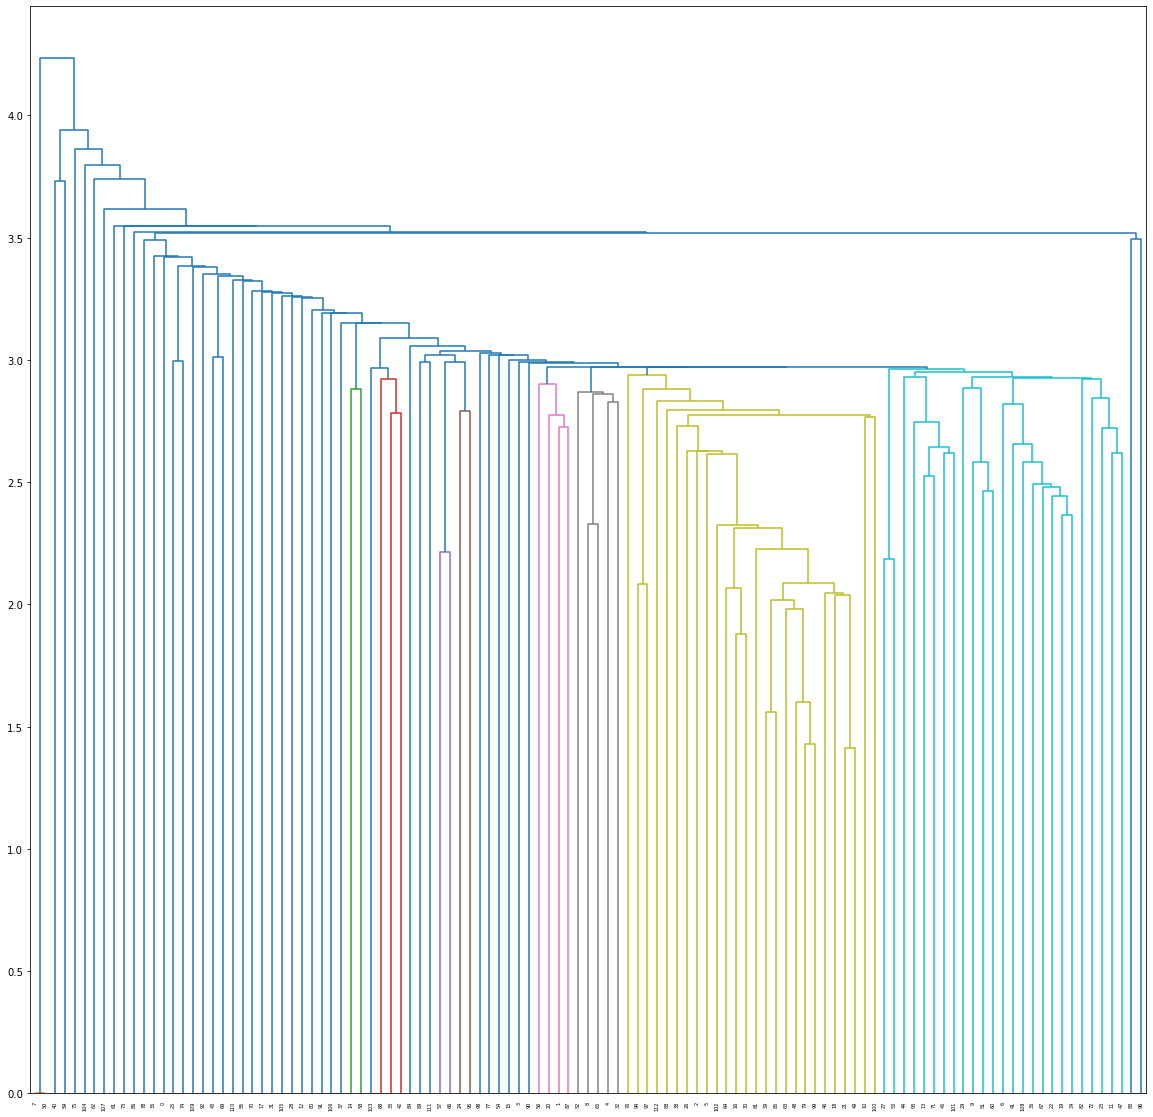

In [132]:
Z = hcluster.linkage(matrix)
plt.figure(figsize=(20, 20))
dn = hcluster.dendrogram(Z)
plt.show()

In [133]:
clusters = hcluster.fcluster(Z, 1.154)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 45


Вертикальная ось дендрограммы отражает уровни объединения кластеров, и выбор порога t связан с определением того уровня, на котором мы хотим разделить данные на отдельные кластеры.

Когда мы проводим горизонтальную линию на дендрограмме, она пересекает вертикальные линии, представляющие уровни схожести. Порог t устанавливается так, чтобы разделить дерево кластеризации на определенное количество кластеров. Кластеры будут формироваться там, где вертикальная линия пересекает горизонтальную линию, и количество кластеров определяется числом пересечений.

Если взять число t = 1.154, то будет 45 кластеров. Если брать значения > 1.154, то количество кластеров = 1. Получается, что это самое маленькое число кластеров > 1, которое получается по результатам кластеризации, именно поэтому я выбрала значение порога t = 1,154

**Метод К-средних**

In [212]:
kmeans = KMeans(n_clusters=21).fit(matrix)
kmeans.labels_

array([13,  4, 20, 16, 12,  0, 13,  7, 12, 14,  2, 16,  6,  5,  9, 12, 20,
        3, 10,  3,  6, 10,  3,  6,  4,  8, 10,  3, 12, 14,  1, 17, 12,  5,
        3,  2,  3, 19, 10,  1, 18,  3,  5, 17,  6,  5,  0, 16,  1, 10,  7,
       14,  4,  3,  4,  5,  4,  4,  9, 18, 14,  3,  1, 10,  1,  4,  4,  3,
       13, 17, 19,  5,  4, 19,  8, 15, 19,  5,  8,  1, 10, 10, 16, 11, 13,
        1, 10,  4,  1,  4,  2, 14,  3,  5,  9,  4, 11,  9, 13,  1,  2,  6,
       10,  5, 19, 14,  5, 14,  3, 13, 16,  0, 10])

In [216]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

results = []

# Цикл по количеству кластеров от 2 до 25
for n_clusters in range(2, 30):
    # среднее значение для каждого вектора
    mean_vectors = np.mean(matrix, axis=1)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(mean_vectors.reshape(-1, 1))  # Преобразуйте векторы в одномерный массив

    # коэффициент silhouette
    silhouette_avg = silhouette_score(mean_vectors.reshape(-1, 1), cluster_labels)

    # Добавьте результат в список
    results.append((n_clusters, silhouette_avg))

# сортировка списка результатов по убыванию Silhouette Score
results.sort(key=lambda x: x[1], reverse=True)

for n_clusters, silhouette_avg in results:
    print(f"Количество кластеров: {n_clusters}")
    print(f"Silhouette Score: {silhouette_avg}")
    print("\n")



Количество кластеров: 2
Silhouette Score: 0.611873677126351


Количество кластеров: 26
Silhouette Score: 0.5961766321433647


Количество кластеров: 21
Silhouette Score: 0.5950354810787833


Количество кластеров: 29
Silhouette Score: 0.5949491907547043


Количество кластеров: 25
Silhouette Score: 0.5909099528475585


Количество кластеров: 22
Silhouette Score: 0.5908439705626697


Количество кластеров: 24
Silhouette Score: 0.5890779039180418


Количество кластеров: 27
Silhouette Score: 0.5876308290084694


Количество кластеров: 28
Silhouette Score: 0.586560240783578


Количество кластеров: 13
Silhouette Score: 0.5864522310550324


Количество кластеров: 17
Silhouette Score: 0.5831167735266167


Количество кластеров: 19
Silhouette Score: 0.5816535930465533


Количество кластеров: 12
Silhouette Score: 0.5811179268217624


Количество кластеров: 20
Silhouette Score: 0.5810203190306399


Количество кластеров: 5
Silhouette Score: 0.5781419631535072


Количество кластеров: 11
Silhouette Score: 0

n_clusters - это целочисленное значение, которое указывает, на сколько кластеров нужно разделить данные. При выборе n_clusters мы определяем, на сколько групп хотим разделить данные, и метод K-средних будет стремиться кластеризовать данные на указанное количество кластеров.

silhouette_score - это метрика оценки качества кластеризации, предназначенная для измерения, насколько объекты внутри одного кластера похожи друг на друга и насколько отличаются от объектов в других кластерах. Эта метрика принимает значения от -1 до 1, где более высокие значения указывают на более точную и однородную кластеризацию. Эта метрика полезна при выборе оптимального числа кластеров.

Я выбрала число кластеров = 21, так как Silhouette Score при этом числе кластеров является одним из наиболее высоких. Мне показалось, что число кластеров = 26 будет слишком большим для нашего набора данных. Silhouette Score я считала по среднему значению векторов для каждой пары. 


## Шаг 4
Для каждого кластера определите центр и выберите по три элемента, наиболее к нему близких (по метрике косинусной близости).

Центр можно определить как среднее арифметическое среди всех элементов кластера по каждому измерению (например, с помощью метода numpy.mean). Кластеры, размер которых не превышает двух элементов, не учитывайте совсем.

**NB! Шаги 4-6 нужно проделать с результатами обеих кластеризаций: и иерархической, и методом К-средних.**

**Иерархическая кластеризация**

In [135]:
#Кол-во элементов в каждом кластере
Z = hcluster.linkage(matrix)
clusters = hcluster.fcluster(Z, 1.154)
cluster_size_Z = {i:list(clusters).count(i) for i in set(clusters)}
cluster_size_Z

{1: 2,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 4,
 7: 6,
 8: 4,
 9: 5,
 10: 26,
 11: 2,
 12: 6,
 13: 17,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 2,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1}

In [136]:
clusters = hcluster.fcluster(Z, 1.154)
for cluster_Z, size_Z in cluster_size_Z.items():
    if size_Z > 2 :
        # Центр 
        cluster_indices_Z = np.where(clusters == cluster_Z)[0]
        cluster_center_Z = np.mean(matrix[cluster_indices_Z], axis=0)

        # Выбираю три элемента, наиболее близких к центру 
        distances_Z = [cosine(cluster_center_Z, vector) for vector in matrix]
        closest_indices_Z = np.argsort(distances_Z)[:3]
        closest_elements_Z = matrix[closest_indices_Z]
        
        print(f"Кластер {cluster_Z}, Количество элементов {size_Z}:")
        print("Центр:", cluster_center_Z)
        print("Ближайшие векторы:", closest_elements_Z)
        print("\n")

Кластер 6, Количество элементов 4:
Центр: [-1.05105075e+00 -1.73211750e-01 -4.51340750e-01 -3.17960015e-01
  8.77182260e-01 -5.05537494e-02  1.15719754e-01  4.30235252e-01
 -1.15057546e+00 -3.71882506e-02  1.01255251e-01 -1.03490515e-01
 -3.24500501e-01 -6.32354498e-01  3.44847236e-01  8.36866245e-01
  3.30621503e-01 -6.99039847e-02  7.65339747e-01  3.25426511e-01
  2.86344923e-02  2.60055745e-01  1.16652149e+00 -9.46455717e-01
  9.01594788e-01 -5.14942013e-01  3.59220076e-02 -1.92015249e-01
 -4.10935268e-01  2.34090008e-01 -5.17132267e-01  4.17712994e-01
 -5.02594769e-01  6.53790981e-01 -8.61878246e-01  9.49853465e-01
  4.54009015e-01  4.95996326e-04  4.68125254e-01 -7.07186773e-01
 -1.99970007e-01  7.57400706e-01  5.34649249e-01  1.55698504e-01
 -5.82497548e-02  5.59144989e-02  9.55842018e-01 -4.76829261e-01
  2.84595240e-01 -1.97820995e-01 -7.65564241e-01 -1.39957992e-01
 -1.10577513e-02  7.71360770e-01  1.28560007e-01 -5.04539981e-02
 -1.57925010e-01  1.01363499e+00  3.35531756e-01

**Метод K-средних**

In [213]:
#сколько элементов в каждом кластере
kmeans = KMeans(n_clusters=21).fit(matrix)
labels = kmeans.labels_
cluster_size_K = {i:list(labels).count(i) for i in set(labels)}
cluster_size_K

{0: 13,
 1: 9,
 2: 10,
 3: 9,
 4: 7,
 5: 8,
 6: 3,
 7: 7,
 8: 2,
 9: 2,
 10: 7,
 11: 7,
 12: 4,
 13: 1,
 14: 5,
 15: 1,
 16: 3,
 17: 3,
 18: 5,
 19: 5,
 20: 2}

In [214]:
for cluster_K, size_K in cluster_size_K.items():
    if size_K > 2:
        #Центр 
        cluster_indices_K = np.where(labels == cluster_K)[0]
        cluster_center_K = np.mean(matrix[cluster_indices_K], axis=0)
   
    
        # выбираю три элемента, наиболее близких к центру 
        distances_K = [cosine(cluster_center_K, vector) for vector in matrix]
        closest_indices_K = np.argsort(distances_K)[:3]
        closest_elements_K = matrix[closest_indices_K]
        
        print(f"Кластер {cluster_K}, Количество элементов {size_K}:")
        print("Центр:", cluster_center_K)
        print("Ближайшие векторы:", closest_elements_K)
        print("\n")


Кластер 0, Количество элементов 13:
Центр: [-0.74361893 -0.24139771 -0.2808677  -0.24479701  0.83673049  0.15644746
  0.14498116  0.25590269 -0.6204606   0.34200654  0.22477277 -0.00662192
 -0.51381863 -0.39064548  0.18657876  0.25155939  0.5850754  -0.19697491
  0.69654285  0.43961408 -0.23754538  0.226008    1.52558676 -1.03746954
  0.38820086 -0.75299746 -0.04112669  0.06758746 -0.26445661  0.27058986
 -0.64363232  0.66084845 -0.5471547   0.02804046 -0.70786325  1.00673383
  0.23079417 -0.50190494  0.13860807 -0.81475117  0.00272923  0.55076151
  0.61349399 -0.01246076 -0.20570931  0.45913723  0.63371547 -0.13039561
  0.0959966  -0.27965201 -0.32871607 -0.30117807  0.08806469  0.58110571
  0.25324054 -0.348066   -0.40523838  1.10822301  0.42676978 -0.51482776
 -0.08586454 -0.58552763  0.05033385  0.0503717   0.70448146  0.26602577
  0.21511    -0.93404403  1.09685145  0.947056    0.73812547  0.51418715
 -0.15266807 -0.78903207 -0.35036085  0.12517954 -0.30245315  0.18395154
 -0.1430

## Шаг 5
Оформите результат в виде набора групп из трех словосочетаний, например:
- идти_дождь, идти_снег, идти_град
- идти_часы, идти_время, идти_урок
- …

**NB! Шаги 4-6 нужно проделать с результатами обеих кластеризаций: и иерархической, и методом К-средних.**

**Иерархическая кластеризация**

In [152]:
clusters = hcluster.fcluster(Z, 1.154)
for cluster_Z, size_Z in cluster_size_Z.items():
    if size_Z > 2:
        # Центр 
        cluster_indices_Z = np.where(clusters == cluster_Z)[0]
        cluster_center_Z = np.mean(matrix[cluster_indices_Z], axis=0)

        # Выбираю три элемента, наиболее близких к центру 
        distances_Z = [cosine(cluster_center_Z, vector) for vector in matrix]
        closest_indices_Z = np.argsort(distances_Z)[:3]
        closest_elements_Z = matrix[closest_indices_Z]
        
        pairs_for_cluster_Z = []
        for idx in closest_indices_Z:
            vector = matrix[idx]
            for pair, representation in representations.items():
                if np.array_equal(vector, representation):
                    pair_str = f"{pair[0]}_{pair[1]}"
                    pairs_for_cluster_Z.append(pair_str)
        
        print(', '.join(map(str, pairs_for_cluster_Z)))
        print("\n")


играть_желание, играть_умение, играть_возможность


играть_вальс, играть_танец, играть_моцарт


играть_шарманка, играть_музыка, играть_песня


играть_музыкант, играть_трубач, играть_актер


играть_мальчик, играть_девочка, играть_мама


играть_судьба, играть_жизнь, играть_трагедия


играть_вечер, играть_день, играть_ночь




**Метод K-средних**

In [215]:
for cluster_K, size_K in cluster_size_K.items():
    if size_K > 2:
        # Центр 
        cluster_indices_K = np.where(labels == cluster_K)[0]
        cluster_center_K = np.mean(matrix[cluster_indices_K], axis=0)
   
        # Выбор трех элементов, наиболее близких к центру 
        distances_K = [cosine(cluster_center_K, vector) for vector in matrix]
        closest_indices_K = np.argsort(distances_K)[:3]
        closest_elements_K = matrix[closest_indices_K]

        
        pairs_for_cluster_K = []
        for idx in closest_indices_K:
            vector = matrix[idx]
            for pair, representation in representations.items():
                if np.array_equal(vector, representation):
                    pair_str = f"{pair[0]}_{pair[1]}"
                    pairs_for_cluster_K.append(pair_str)
        print(', '.join(map(str, pairs_for_cluster_K)))
        print("\n")

играть_день, играть_раз, играть_вечер


играть_мальчик, играть_мальчишка, играть_старик


играть_судьба, играть_жизнь, играть_игра


играть_оркестр, играть_джаз, играть_концерт


играть_свет, играть_солнце, играть_луч


играть_улыбка, играть_любовь, играть_танец


играть_футбол, играть_матч, играть_спартак


играть_девушка, играть_девочка, играть_женщина


играть_актер, играть_артист, играть_гамлет


играть_желание, играть_умение, играть_возможность


играть_гармонь, играть_шарманка, играть_патефон


играть_мать, играть_дочь, играть_жена


играть_песня, играть_музыка, играть_пьеса


играть_моцарт, играть_шопен, играть_мольер


играть_шахматы, играть_прятки, играть_игра


играть_бог, играть_дитя, играть_песнь




## Шаг 6
Подготовьте очень краткий (буквально на абзац) анализ результатов. Однородные ли, на ваш взгляд, получились группы? Все ли значения глагола удалось «поймать» и проиллюстрировать?

**NB! Шаги 4-6 нужно проделать с результатами обеих кластеризаций: и иерархической, и методом К-средних.**

Я условно выделила следующие группы по семантической схожести из файла: 
1. Музыка/танец
2. Театр
3. Вид игр/ спорт
4. Субъекты 
   + отдельно по ж.р., м.р. и мн.ч.
5. Свет
6. Военные действия 
   + играть_солдат, играть_война, играть_марш, играть_кровь, играть_россия
7. Погода/природные условия/явления 
   + играть_ветер, играть_солнце, играть_вода, играть_звезда
8. Родственные связи 
   + играть_мать, играть_дочь, играть_мама, играть_отец, играть_дитя, играть_брат, играть_жена
9. Любовь 
   + играть_свадьба, играть_сердце, играть_судьба, играть_любовь, играть_жена
10. Игра с чем-то (инструмент)
11. Лицо/ тело 
    + играть_лицо, играть_глаз, играть_рука и др.
12. Важность
13. Человеческие умения/усилия/желание
14. Повороты судьбы 
    + играть_трагедия, играть_бог, играть_судьба, играть_жизнь
15. Карточная игра 
    + играть_дама, играть_король, играть_карта, играть_деньги, играть_партия
16. Профессии (творческие)
17. Время 

### Результаты иерархической кластеризации: 
играть_желание, играть_умение, играть_возможность - *умения и навыки*


играть_вальс, играть_танец, играть_моцарт - *движение, музыка*


играть_шарманка, играть_музыка, играть_песня - *музыка*


играть_музыкант, играть_трубач, играть_актер - *творческие профессии*


играть_мальчик, играть_девочка, играть_мама - *субъекты, гендерные роли*


играть_судьба, играть_жизнь, играть_трагедия - *жизнь и повороты судьбы*


играть_вечер, играть_день, играть_ночь - *время суток*

**В целом, группы получились достаточно однородными, нет элементов, которые бы сильно выбивались из групп. Элементы внутри группа имеют схожую семантику.**

**Не все значения глагола удалось поймать, к примеру, нет отдельной группы "театр", хотя есть профессия актера. Нет групп "свет", "военные действия", "природных явлений", "родственных связей" (хотя есть "играть_мама", которое входит в родственные связи), "любовь", "карточная игра".**

### Результаты метода К-средних
играть_день, играть_раз, играть_вечер - *время*


играть_мальчик, играть_мальчишка, играть_старик - *объект мужского пола*


играть_судьба, играть_жизнь, играть_игра - *повороты судьбы, не слишком сбалансированная группа*


играть_оркестр, играть_джаз, играть_концерт - *музыка*


играть_свет, играть_солнце, играть_луч - *свет/тепло*


играть_улыбка, играть_любовь, играть_танец - *любовь и ее проявления, не слишком сбалансированная группа*


играть_футбол, играть_матч, играть_спартак - *связано с футболом*


играть_девушка, играть_девочка, играть_женщина - *объект женского пола*


играть_актер, играть_артист, играть_гамлет - *театр*


играть_желание, играть_умение, играть_возможность - *человеческие умения/усилия/желание*


играть_гармонь, играть_шарманка, играть_патефон - *музыкальные инструменты/то, что воспроизводит музыку*


играть_мать, играть_дочь, играть_жена - *женские гендерные роли/родственные связи по женской линии*


играть_песня, играть_музыка, играть_пьеса - *музыка и музыкальные жанры*


играть_моцарт, играть_шопен, играть_мольер - *творческие люди, авторы*


играть_шахматы, играть_прятки, играть_игра - *виды игр + сама игра *


играть_бог, играть_дитя, играть_песнь - *не сбалансированная группа*

**Группы достаточно сбалансированные, за исключением, как мне кажется, трех групп.**

**Не все значения глагола удалось поймать. Отсутствует значение "военные действия", "природные явления" (присутствует *играть_солнце*), "игра с чем-то", "лицо/тело", "важность", "карточная игра", "профессии"**.

В результате этой кластеризации биграммы поделились на группы, которые не выделила я сама.


### 🌟В целом, кажется, что иерархическая кластеризация справилась хуже, чем метод К-средних🌟

## Шаг 7 (бонус на 9-10). 
Вместо предложенного датасета возьмите свой: выберите предикат и по любому корпусу составьте список существительных - его наиболее частотных аргументов (в списке должно быть около 100 словосочетаний). Максимально четко опишите процедуру подготовки датасета: какой использовался корпус, как был составлен сам список.